In [5]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [7]:
# path for data folder
path= r"C:\Users\Holly\OneDrive\David's work\project 1 machine learning\02 Data"

In [9]:
# Importing scaled weather features data 
weather_df= pd.read_csv(os.path.join(path,r"C:\Users\Holly\OneDrive\David's work\project 1 machine learning\02 Data\Dataset-weather-prediction-dataset-processed_scaled.csv"))

In [11]:
#Importing pleasant weather 'answer' dataset 
pleasant_df= pd.read_csv(os.path.join(path,r"C:\Users\Holly\OneDrive\David's work\project 1 machine learning\02 Data\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"))

In [13]:
weather_df.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,id,DATE,MONTH
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237,0,19600101,1
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141,1,19600102,1
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078,2,19600103,1
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511,3,19600104,1
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186,4,19600105,1


In [15]:
pleasant_df.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
#Reduce to just the temperature variables (excluding Gdansk, Roma,Tours)
df = weather_df[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [19]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasant_df.drop(['DATE'], axis=1)

In [21]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [23]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


[Text(0.33593344850280277, 0.9838709677419355, 'x[14] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.0706433441277593, 0.9516129032258065, 'x[29] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.20328839631528103, 0.967741935483871, 'True  '),
 Text(0.019713194125696224, 0.9193548387096774, 'x[5] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22.0

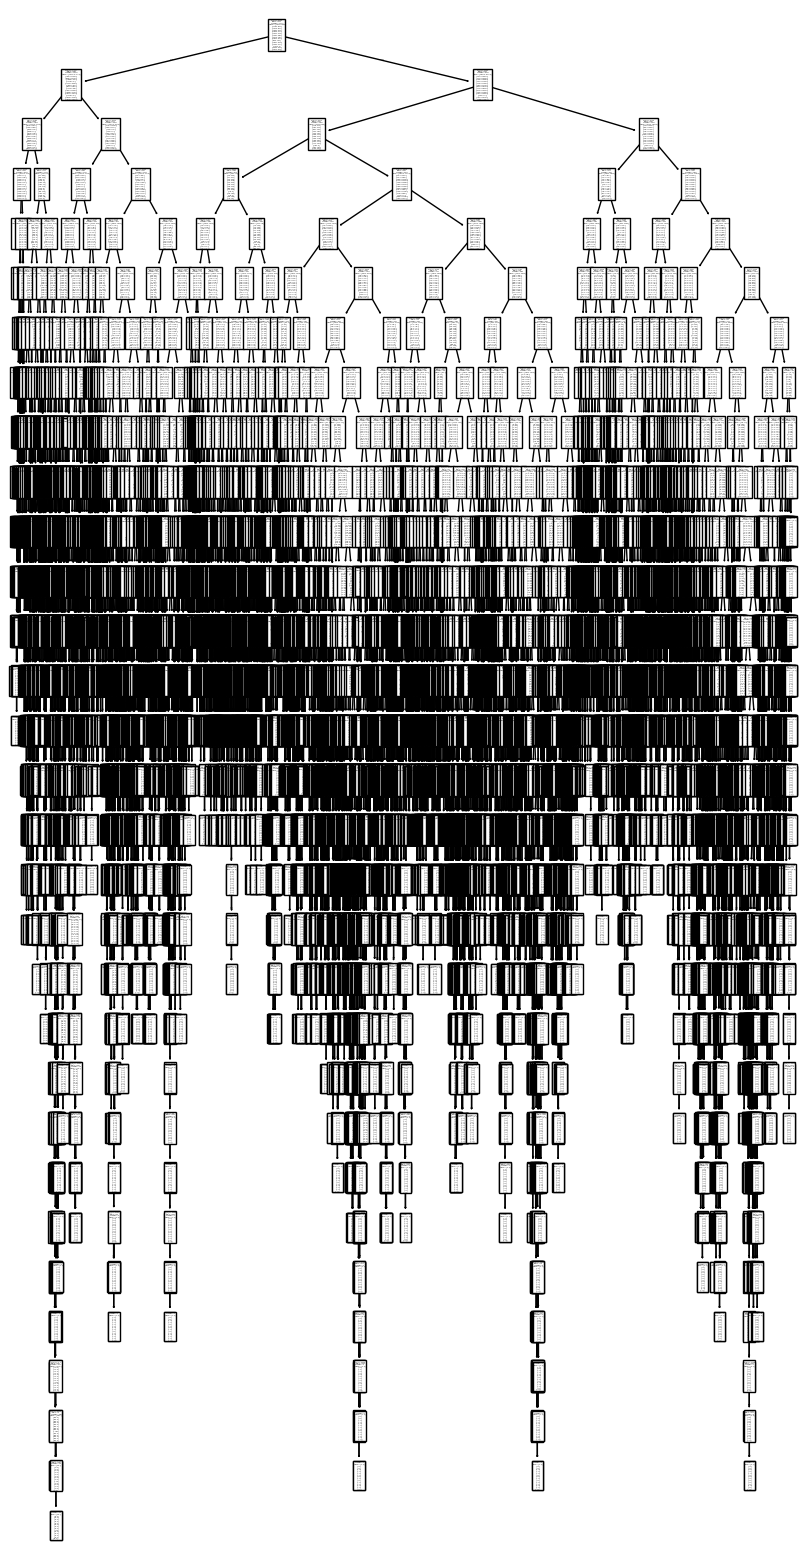

In [29]:
#Run Decision Tree classifier
# 1. Create the decision tree model
dt_model = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
# 2. Fit (train) the model on your training data
dt_model.fit(X_train, y_train)

figure(figsize=(10,20))
tree.plot_tree(dt_model)

In [31]:
# Predict the outcomes for the training and test data
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

In [33]:
# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

Train accuracy: 1.00
Test accuracy: 0.47


In [35]:
print('Plain train accuracy:', accuracy_score(y_train, y_pred_train))
print('Cross-validated train accuracy:', cross_val_score(dt_model, X_train, y_train, cv=3, scoring='accuracy').mean())

Plain train accuracy: 1.0
Cross-validated train accuracy: 0.46060888738728645


C:\Users\Holly\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


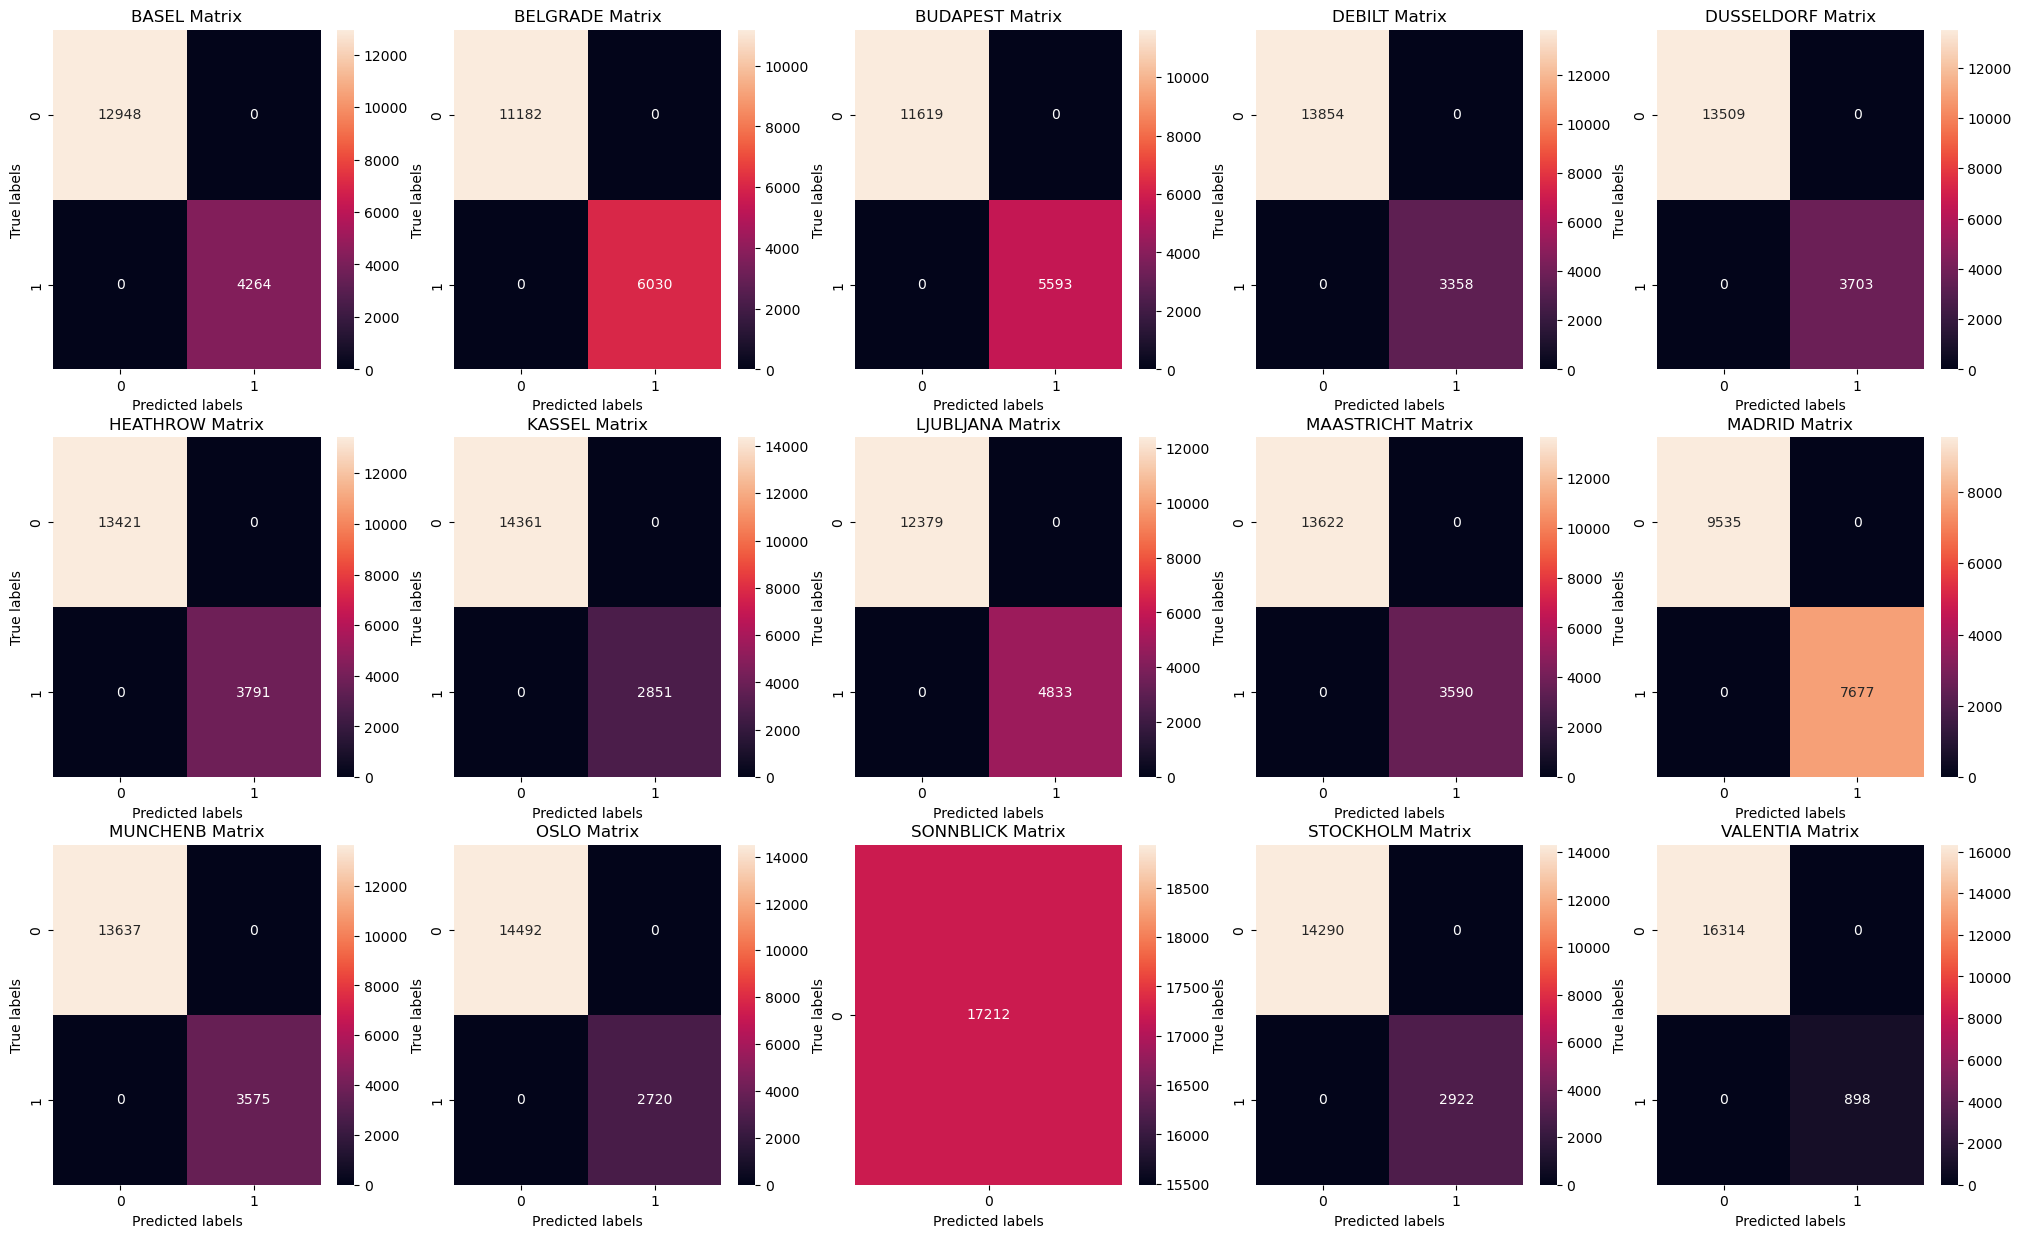

In [36]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [39]:
y_test_pred = dt_model.predict(X_test)

In [41]:
print('Test accuracy score: ', accuracy_score(y_test, y_test_pred))

Test accuracy score:  0.47263855001742766


In [43]:
multilabel_confusion_matrix(y_test, y_test_pred)

array([[[3850,  488],
        [ 448,  952]],

       [[3174,  602],
        [ 544, 1418]],

       [[3410,  490],
        [ 508, 1330]],

       [[4285,  352],
        [ 352,  749]],

       [[4095,  412],
        [ 404,  827]],

       [[4086,  484],
        [ 410,  758]],

       [[4499,  316],
        [ 330,  593]],

       [[3672,  523],
        [ 454, 1089]],

       [[4154,  408],
        [ 375,  801]],

       [[2808,  360],
        [ 412, 2158]],

       [[4168,  378],
        [ 377,  815]],

       [[4534,  345],
        [ 314,  545]],

       [[5738,    0],
        [   0,    0]],

       [[4426,  340],
        [ 387,  585]],

       [[5303,  159],
        [ 166,  110]]], dtype=int64)

C:\Users\Holly\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


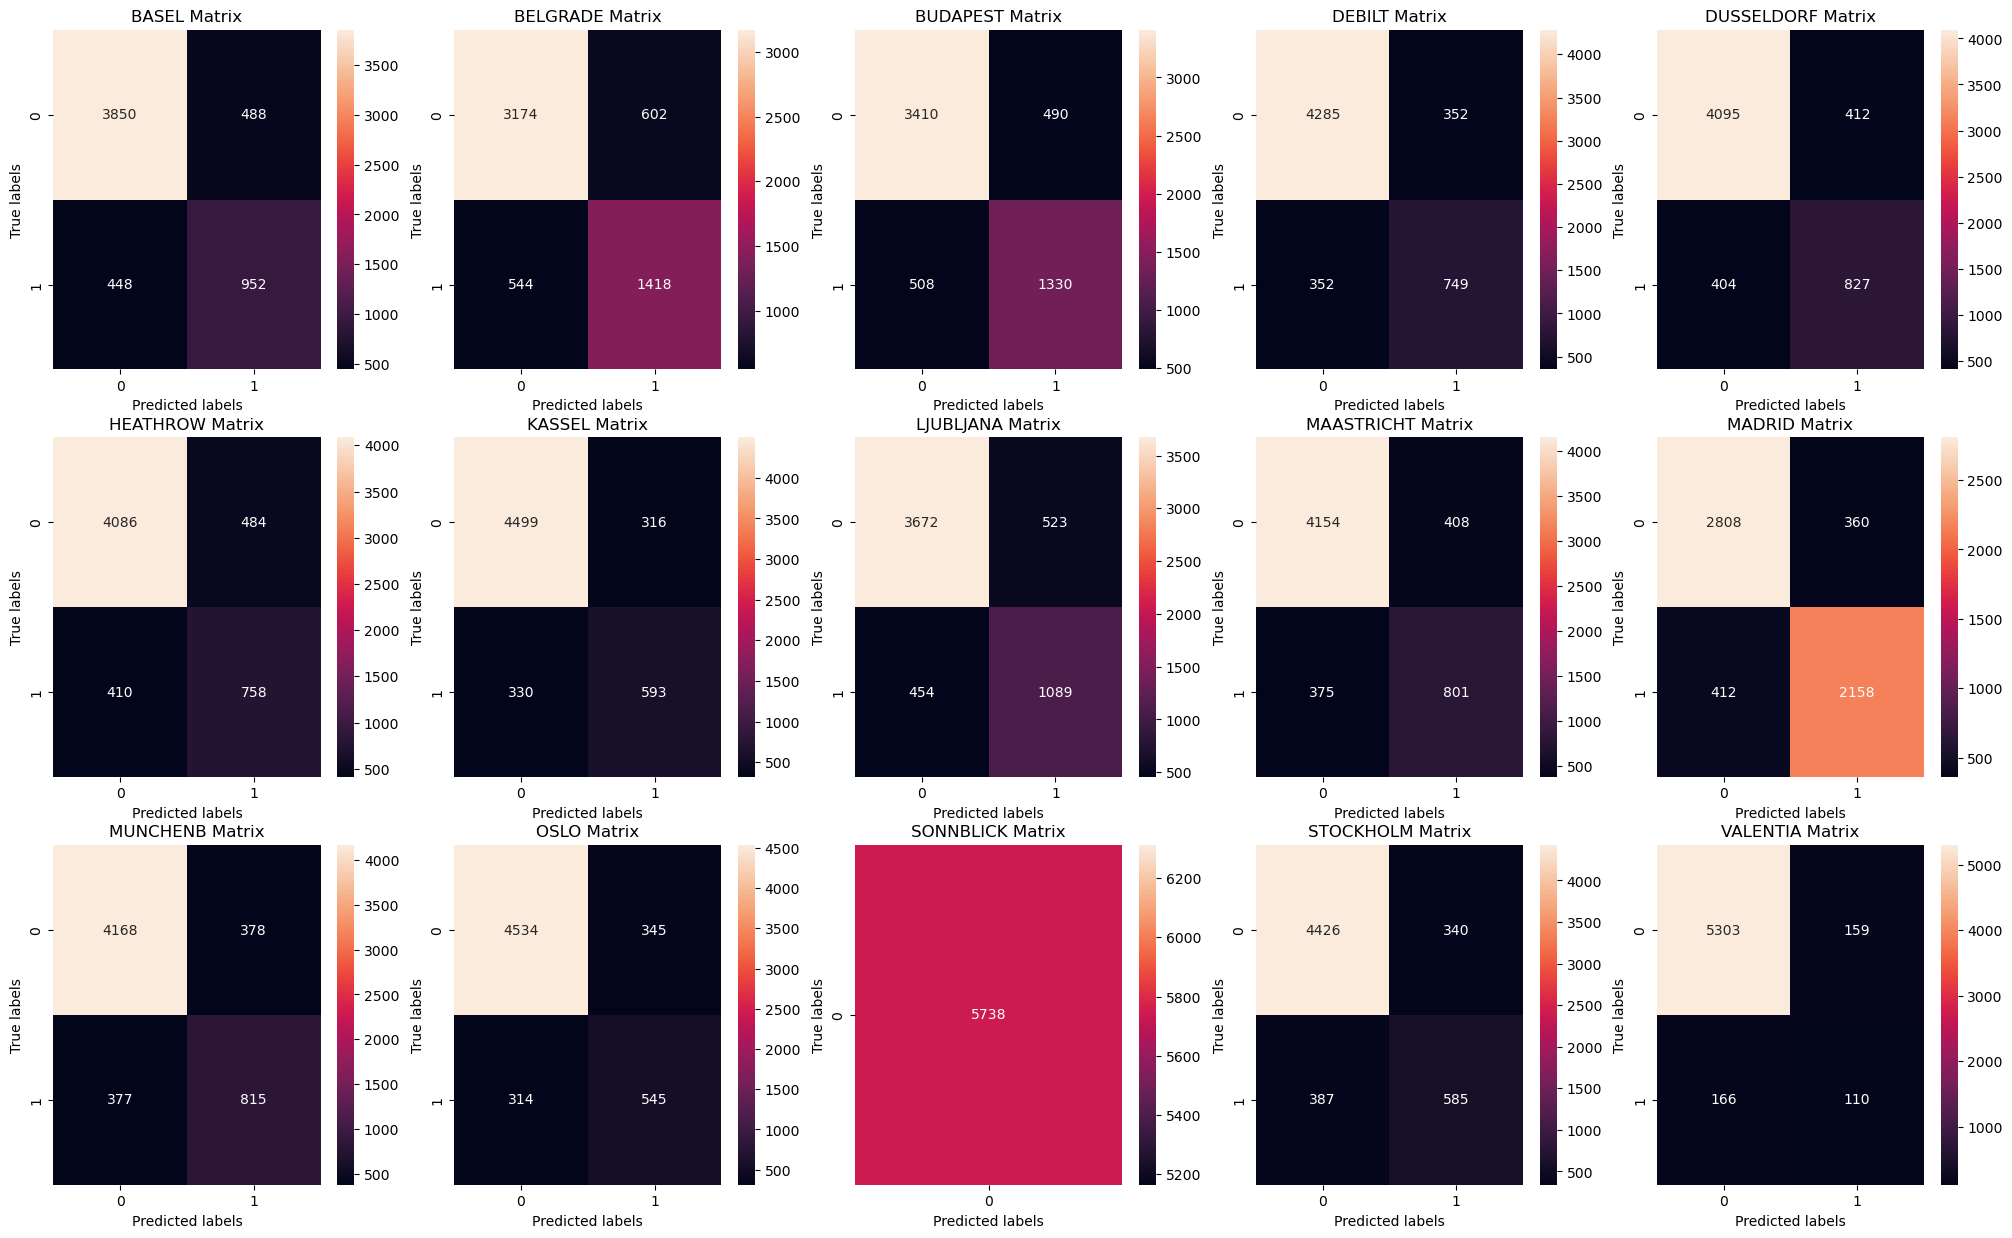

In [45]:
#Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1